# Lektion 3: Übung Binäre Klassifikation mit Diabetes-Daten

# Classification - Binäre Klassifikation mit Diabetes-Daten

**Supervised Machine Learning** funktioniert so:

> \( f([x_1, x_2, x_3, ...]) = y \)

- **Features** (\(x\)): Eingabewerte (z.B. Blutzucker, BMI, Alter)
- **Label** (\(y\)): Ergebnis (0 oder 1)

**Klassifikation** = Vorhersage von Kategorien/Klassen basierend auf Wahrscheinlichkeiten.

**Binäre Klassifikation** = 2 Klassen (z.B. 0 oder 1, True/False, Diabetic/Non-Diabetic)

**Ziel**: Vorhersage, ob ein Patient diabetisch ist (1) oder nicht (0) basierend auf medizinischen Daten.

---

## Daten laden

**Wichtig**: 
1. Lade [diabetes.csv](https://raw.githubusercontent.com/MicrosoftLearning/mslearn-ml-basics/refs/heads/main/Labfiles/data/diabetes.csv) herunter
2. Hochladen mit **Upload Data** Button
3. Code ausführen mit **► Run**

**Quelle**: National Institute of Diabetes and Digestive and Kidney Diseases


In [1]:
import pandas as pd

# Daten laden
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.head())


   PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          1.213191   21         0  
1                47            36  21.240576          0.158365   23         0  
2                52            35  41.511523          0.079019   23         0  
3                25           304  29.582192          1.282870   43         1  
4                27            35  42.604536          0.549542   22         0  


## Datenstruktur verstehen

Das Dataset enthält diagnostische Informationen von Patienten.

**Features** (8 medizinische Messwerte):
- `Pregnancies`: Anzahl Schwangerschaften
- `PlasmaGlucose`: Blutzuckerspiegel
- `DiastolicBloodPressure`: Blutdruck (diastolisch)
- `TricepsThickness`: Hautfaltendicke (Trizeps)
- `SerumInsulin`: Insulin-Level
- `BMI`: Body Mass Index
- `DiabetesPedigree`: Diabetes-Familiengeschichte
- `Age`: Alter

**Label** (Zielvariable):
- `Diabetic`: **0** = Nicht-Diabetiker, **1** = Diabetiker

Wir trennen Features (**X**) und Label (**y**) für das Training.


In [2]:
# Features und Labels trennen
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure',
            'TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])


Patient 1 
  Features: [np.float64(0.0), np.float64(171.0), np.float64(80.0), np.float64(34.0), np.float64(23.0), np.float64(43.50972593), np.float64(1.213191354), np.float64(21.0)] 
  Label: 0
Patient 2 
  Features: [np.float64(8.0), np.float64(92.0), np.float64(93.0), np.float64(47.0), np.float64(36.0), np.float64(21.24057571), np.float64(0.158364981), np.float64(23.0)] 
  Label: 0
Patient 3 
  Features: [np.float64(7.0), np.float64(115.0), np.float64(47.0), np.float64(52.0), np.float64(35.0), np.float64(41.51152348), np.float64(0.079018568), np.float64(23.0)] 
  Label: 0
Patient 4 
  Features: [np.float64(9.0), np.float64(103.0), np.float64(78.0), np.float64(25.0), np.float64(304.0), np.float64(29.58219193), np.float64(1.282869847), np.float64(43.0)] 
  Label: 1


## Feature-Verteilungen visualisieren

Wir erstellen **Boxplots** für jedes Feature, aufgeteilt nach Label (0 vs. 1).

**Ziel**: Herausfinden, welche Features sich zwischen diabetischen und nicht-diabetischen Patienten unterscheiden.

**Was sind Boxplots?**
- Zeigen Median, Quartile (25%, 75%) und Ausreißer
- Vergleichen Verteilungen zwischen Gruppen

**Wichtige Beobachtung**: `Pregnancies` und `Age` zeigen deutliche Unterschiede → Diese Features sind **prädiktiv**!


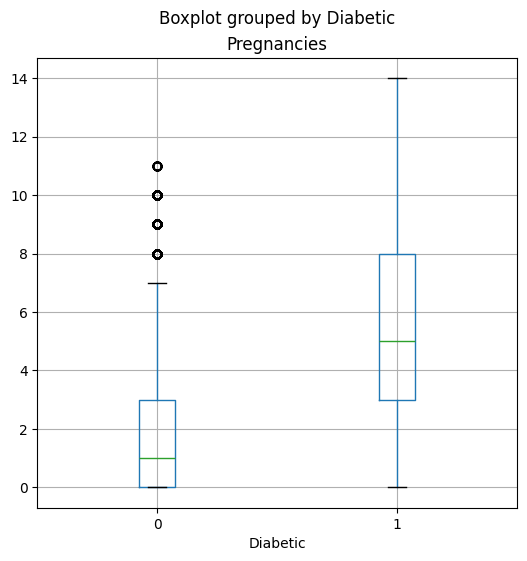

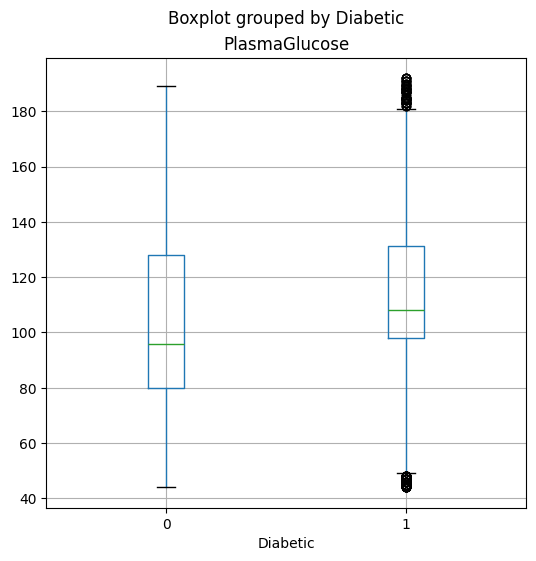

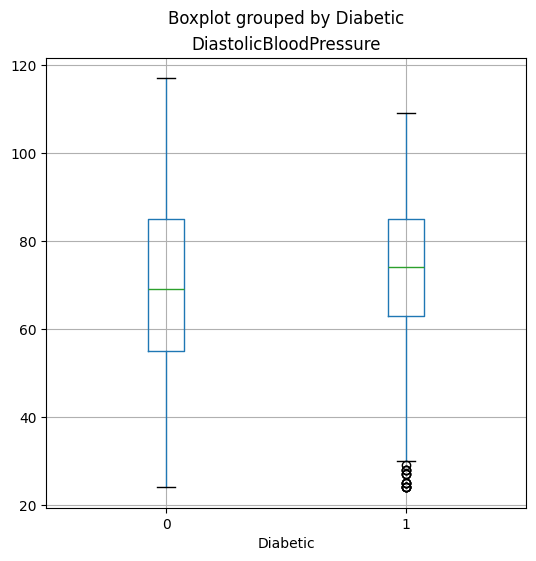

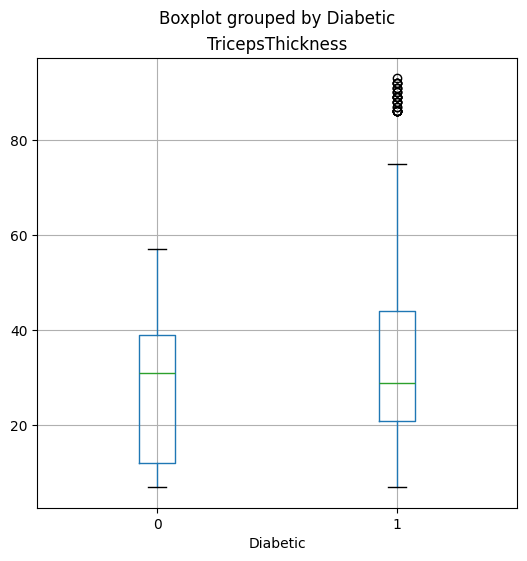

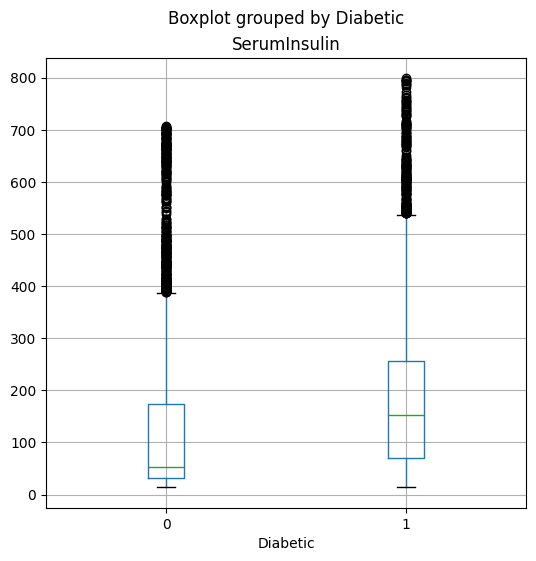

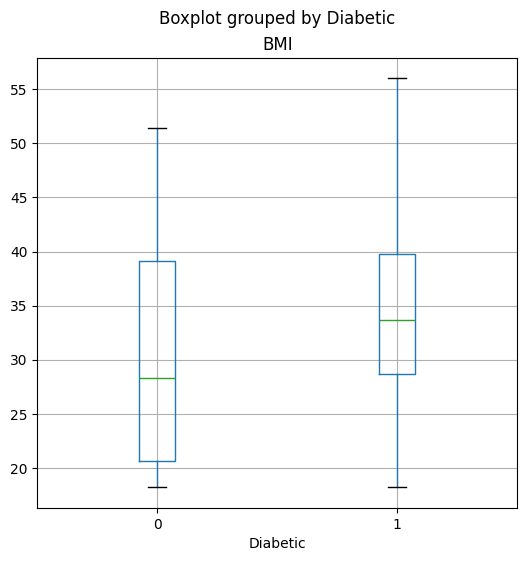

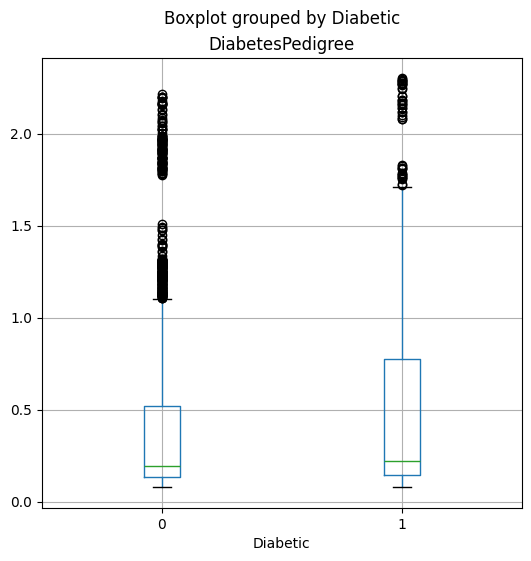

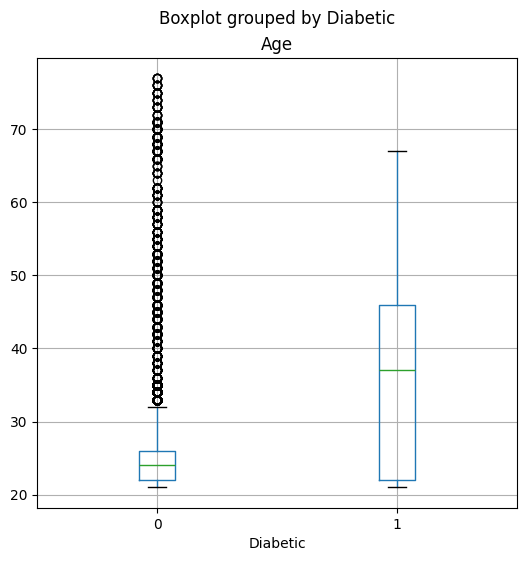

In [3]:
from matplotlib import pyplot as plt

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure',
            'TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']

for col in features:
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,6))
    plt.title(col)
plt.show()


## Train-Test-Split

**Warum brauchen wir einen Split?**

Wir haben ein Dataset mit **bekannten Labels** (0/1). Um das Modell objektiv zu bewerten:
- **70% für Training**: Modell lernt Muster
- **30% für Test**: Modell wird auf *neuen* Daten getestet

**Vorteil**: Wir können vorhergesagte Labels mit echten Labels vergleichen → objektive Performance-Messung!

**scikit-learn** macht das mit `train_test_split`:
- Zufälliger Split (statistisch fair)
- `random_state=0` macht Ergebnisse reproduzierbar


In [4]:
from sklearn.model_selection import train_test_split

# 70-30 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))


Training cases: 10500
Test cases: 4500


## Modell trainieren: Logistic Regression

**Logistic Regression** = Der Standard-Algorithmus für binäre Klassifikation

**Wichtig**: Trotz des Namens ist es ein **Klassifikations**-Algorithmus (nicht Regression)!

**Wie es funktioniert**:
- Verwendet die **logistische Funktion** (s-förmige Kurve / Sigmoid)
- Berechnet **Wahrscheinlichkeiten** für jede Klasse (0 bis 1)
- Schwellenwert (meist 0.5) bestimmt finale Klasse

**Regularisierung** (`C`-Parameter):
- `C = 1/reg` (hier: `C=100` weil `reg=0.01`)
- Verhindert **Overfitting** (zu spezifisch auf Trainingsdaten)
- Hilft dem Modell zu **generalisieren**

**Hyperparameter vs. Parameter**:
- **Parameter**: Werte *in* den Daten (z.B. Blutzucker = 120)
- **Hyperparameter**: Von *außen* definiert (z.B. `C=100`)


In [5]:
# Modell trainieren
from sklearn.linear_model import LogisticRegression

# Regularisierungsrate
reg = 0.01

# Logistic Regression mit Regularisierung
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print(model)


LogisticRegression(C=100.0, solver='liblinear')


## Vorhersagen machen

Jetzt verwenden wir das trainierte Modell, um Labels für die Test-Daten vorherzusagen.

**`model.predict()`**: Gibt Klassen zurück (0 oder 1)

**Was passiert intern**:
1. Modell berechnet Wahrscheinlichkeiten für jede Klasse
2. Schwellenwert (0.5) entscheidet: < 0.5 → Klasse 0, ≥ 0.5 → Klasse 1
3. Finale Klassen-Vorhersage

Wir vergleichen vorhergesagte Labels mit echten Labels aus dem Test-Set.


In [6]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ', y_test)


Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]


## Modell evaluieren mit Accuracy

**Problem**: Zu viele Werte zum manuellen Vergleich!

**Lösung**: Metriken verwenden

**Accuracy (Genauigkeit)**:
- Proportion der korrekten Vorhersagen
- Formel: \( \text{Accuracy} = \frac{\text{Richtige Vorhersagen}}{\text{Alle Vorhersagen}} \)

**Interpretation**:
- **1.0** = 100% korrekt (perfekt!)
- **0.75** = 75% korrekt (gut)
- **0.5** = 50% korrekt (wie Münzwurf, schlecht)
- **0.0** = 0% korrekt (nutzlos)

`scikit-learn` berechnet Accuracy automatisch mit `accuracy_score()`.


In [7]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))


Accuracy:  0.7891111111111111


## Zusammenfassung

**Was wir gelernt haben**:

✅ **Daten vorbereiten**: Features und Labels trennen
✅ **Visualisieren**: Boxplots zeigen prädiktive Features
✅ **Train-Test-Split**: 70-30 für objektive Bewertung
✅ **Logistic Regression**: Standard-Algorithmus für binäre Klassifikation
✅ **Vorhersagen**: `model.predict()` gibt Klassen (0/1) zurück
✅ **Accuracy**: Einfachste Metrik zur Modellbewertung

**Ergebnis**: ~75% Accuracy = Modell kann Diabetes mit vernünftiger Genauigkeit vorhersagen!

---

### Aber: Ist Accuracy genug?

**Kritische Frage**: Was, wenn die Klassen unbalanciert sind?
- Beispiel: 95% gesund, 5% krank
- Ein Modell, das immer "gesund" vorhersagt, hat 95% Accuracy!
- Aber es findet **keinen einzigen** kranken Patienten!

**Lösung**: Bessere Metriken → **Nächstes Notebook**:
- **Confusion Matrix**: Detaillierte Fehleranalyse
- **Precision & Recall**: Wie viele kranke Patienten wurden gefunden?
- **ROC-Kurve & AUC**: Gesamtperformance visualisieren


### Experimt 1-3 

In [8]:
# Vergleiche verschiedene reg-Werte
for reg in [0.001, 0.01, 0.1, 1.0]:
    model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print(f"reg={reg}: Accuracy={acc:.3f}")


reg=0.001: Accuracy=0.789
reg=0.01: Accuracy=0.789
reg=0.1: Accuracy=0.789
reg=1.0: Accuracy=0.789


In [10]:
# Zeige Wahrscheinlichkeiten statt nur Klassen
probabilities = model.predict_proba(X_test)
print("Erste 5 Patienten:")
for i in range(5):
    print(f"Patient {i+1}: P(Nicht-Diabetiker)={probabilities[i][0]:.2f}, P(Diabetiker)={probabilities[i][1]:.2f} → Klasse: {predictions[i]}")


Erste 5 Patienten:
Patient 1: P(Nicht-Diabetiker)=0.82, P(Diabetiker)=0.18 → Klasse: 0
Patient 2: P(Nicht-Diabetiker)=0.96, P(Diabetiker)=0.04 → Klasse: 0
Patient 3: P(Nicht-Diabetiker)=0.80, P(Diabetiker)=0.20 → Klasse: 0
Patient 4: P(Nicht-Diabetiker)=0.25, P(Diabetiker)=0.75 → Klasse: 1
Patient 5: P(Nicht-Diabetiker)=0.35, P(Diabetiker)=0.65 → Klasse: 1


In [11]:
# Welche Features sind am wichtigsten?
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)
print(feature_importance)


                  Feature  Coefficient
6        DiabetesPedigree     0.952184
0             Pregnancies     0.268158
7                     Age     0.056753
5                     BMI     0.048749
3        TricepsThickness     0.021690
2  DiastolicBloodPressure     0.009995
1           PlasmaGlucose     0.008812
4            SerumInsulin     0.003665


## 🧪 Experimente - Erkenntnisse

### 1. Regularisierung
- Alle reg-Werte → gleiche Accuracy (78.9%)
- **Fazit**: Modell ist stabil, kein Overfitting

### 2. Wahrscheinlichkeiten
- Modell gibt nicht nur Klassen (0/1), sondern Wahrscheinlichkeiten
- Patient 2: 96% sicher → Klar!
- Patient 5: 65% sicher → Grenzfall, weitere Tests?
- **Fazit**: Bei kritischen Diagnosen Schwellenwert anpassen

### 3. Feature Importance
- **DiabetesPedigree (0.95)** = Mit Abstand wichtigste!
- Genetik > aktuelle Messwerte
- PlasmaGlucose nur Platz 7 (überraschend!)
- **Fazit**: Familiengeschichte ist Hauptrisikofaktor

### Key Takeaway
🎯 Nicht nur Accuracy anschauen!
- Wahrscheinlichkeiten zeigen Sicherheit
- Feature Importance zeigt, worauf es wirklich ankommt


## Overfitting (Überanpassung)

**Definition**: Modell lernt Trainingsdaten auswendig statt Muster zu verstehen

**Erkennbar an**: 
- Training: 99% Accuracy
- Test: 65% Accuracy
- Große Lücke = Overfitting!

**Ursachen**:
- Modell zu komplex
- Zu wenig Daten
- Zu lange trainiert

**Lösung**: 
- Regularisierung (C-Parameter)
- Mehr Trainingsdaten
- Einfacheres Modell

**Beispiel**: Vokabeln auswendig lernen vs. verstehen
Overfitting = Modell ist wie ein Schüler, der die Beispielaufgaben auswendig lernt statt die Mathematik dahinter zu verstehen → Funktioniert nur bei bekannten Aufgaben, versagt bei neuen!

# Übung: Durchführen von Klassifizierung mit alternativen Metriken

# Classification Metrics - Alternative Metriken zur Modellbewertung

**Problem mit Accuracy**: 
- Nur 3% der Bevölkerung sind diabetisch
- Ein Modell, das immer 0 vorhersagt → 97% Accuracy
- Aber: Erkennt KEINEN EINZIGEN kranken Patienten!

**Lösung**: Bessere Metriken verwenden!

**In diesem Notebook**:
1. Classification Report (Precision, Recall, F1-Score)
2. Confusion Matrix visualisieren
3. ROC-Kurve und AUC
4. Preprocessing mit Pipelines
5. Random Forest vs. Logistic Regression
6. Model Persistence

---

## Daten laden und Basis-Modell trainieren

Wir starten mit dem gleichen Setup wie in der vorherigen Übung.


In [12]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Daten laden
diabetes = pd.read_csv('diabetes.csv')

# Features und Labels trennen
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

# Train-Test-Split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

# Logistic Regression trainieren
from sklearn.linear_model import LogisticRegression

reg = 0.01
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)

predictions = model.predict(X_test)
print('Predicted labels: ', predictions[:10])  # Erste 10
print('Actual labels:    ', y_test[:10])

print('\nAccuracy: ', accuracy_score(y_test, predictions))


Training cases: 10500
Test cases: 4500
Predicted labels:  [0 0 0 1 1 0 0 0 1 0]
Actual labels:     [0 0 1 1 1 1 0 0 1 0]

Accuracy:  0.7891111111111111


## Classification Report - Detaillierte Metriken

Der **Classification Report** zeigt für jede Klasse (0 und 1):

- **Precision**: Von allen als "diabetisch" vorhergesagten, wie viele sind es wirklich?
- **Recall**: Von allen tatsächlich Diabetischen, wie viele wurden erkannt?
- **F1-Score**: Harmonisches Mittel von Precision und Recall
- **Support**: Anzahl der Instanzen dieser Klasse im Test-Set

**Wichtig für binäre Klassifikation**: 
- Klasse **1** = "Positive Klasse" (Diabetisch)
- Precision & Recall der Klasse 1 sind besonders wichtig!


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



## Precision und Recall einzeln

**Precision** (Genauigkeit):
- Frage: "Von allen positiv Vorhergesagten, wie viele sind wirklich positiv?"
- Formel: \( \text{Precision} = \frac{TP}{TP + FP} \)
- Wichtig wenn: Falsch-Positive teuer sind (z.B. unnötige Behandlungen)

**Recall** (Trefferquote, Sensitivität):
- Frage: "Von allen tatsächlich Positiven, wie viele wurden gefunden?"
- Formel: \( \text{Recall} = \frac{TP}{TP + FN} \)
- Wichtig wenn: Falsch-Negative gefährlich sind (z.B. kranke Patienten übersehen)

**Trade-off**: Höhere Precision → niedrigerer Recall (und umgekehrt)


In [14]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))


Overall Precision: 0.723673792557403
Overall Recall: 0.6036988110964333


## Confusion Matrix - Wo macht das Modell Fehler?

Die **Confusion Matrix** zeigt die 4 Kategorien von Vorhersagen:

| | Predicted 0 | Predicted 1 |
|---|-------------|-------------|
| **Actual 0** | TN (True Negative) | FP (False Positive) |
| **Actual 1** | FN (False Negative) | TP (True Positive) |

**Ideales Modell**: Hohe Werte auf der Diagonale (TN und TP)

**Interpretation**:
- **TN** (oben links): Korrekt als gesund erkannt ✅
- **FP** (oben rechts): Fälschlicherweise als krank erkannt ⚠️
- **FN** (unten links): Krank, aber übersehen 🚨 GEFÄHRLICH!
- **TP** (unten rechts): Korrekt als krank erkannt ✅


In [15]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix als Array
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)
print("\nInterpretation:")
print(f"True Negatives (TN):  {cm[0][0]}")
print(f"False Positives (FP): {cm[0][1]}")
print(f"False Negatives (FN): {cm[1][0]}")
print(f"True Positives (TP):  {cm[1][1]}")


Confusion Matrix:
[[2637  349]
 [ 600  914]]

Interpretation:
True Negatives (TN):  2637
False Positives (FP): 349
False Negatives (FN): 600
True Positives (TP):  914


## Confusion Matrix als Heatmap

Eine visuelle Darstellung macht es leichter, Muster zu erkennen:
- **Dunkle Diagonale** (oben links → unten rechts) = Gut!
- **Helle Diagonale** = Viele Fehler
- **Heatmap-Farben**: Je dunkler, desto mehr Fälle

**Ziel**: Starke Färbung auf der Diagonale (TN und TP hoch)


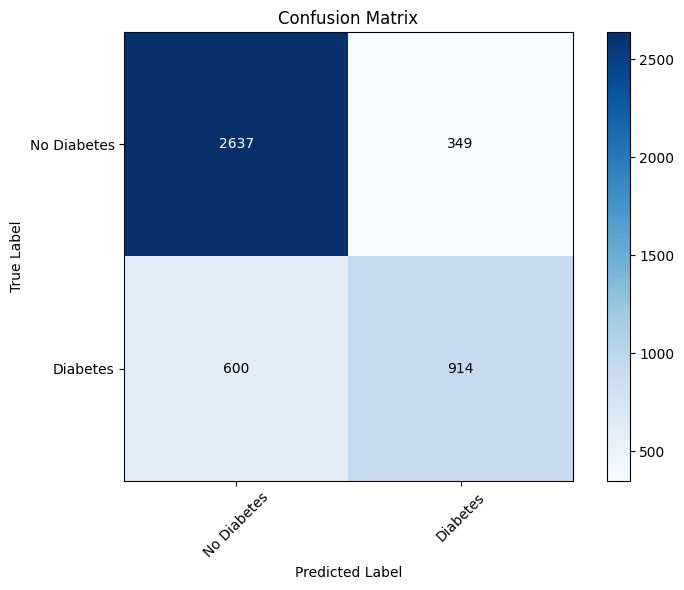

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion Matrix erstellen
cm = confusion_matrix(y_test, predictions)

# Heatmap plotten
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Labels hinzufügen
classes = ['No Diabetes', 'Diabetes']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Zahlen in Zellen schreiben
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


## Wahrscheinlichkeiten statt nur Klassen

**Wichtig**: Modelle geben nicht nur 0/1 zurück, sondern **Wahrscheinlichkeiten**!

**Wie funktioniert's?**
- Modell berechnet: P(Diabetisch) und P(Nicht-Diabetisch)
- Summe immer = 1.0
- **Schwellenwert** (meist 0.5) entscheidet finale Klasse

**predict_proba()** gibt beide Wahrscheinlichkeiten zurück:
- Spalte 0: Wahrscheinlichkeit für Klasse 0 (Nicht-Diabetisch)
- Spalte 1: Wahrscheinlichkeit für Klasse 1 (Diabetisch)

**Nutzen**: Man kann den Schwellenwert anpassen je nach Use Case!


In [17]:
y_scores = model.predict_proba(X_test)
print("Wahrscheinlichkeiten für erste 5 Patienten:")
print("Format: [P(Nicht-Diabetisch), P(Diabetisch)]")
print(y_scores[:5])

print("\nBeispiel Patient 1:")
print(f"  P(Nicht-Diabetisch): {y_scores[0][0]:.3f}")
print(f"  P(Diabetisch): {y_scores[0][1]:.3f}")
print(f"  → Vorhersage: {predictions[0]} (Schwellenwert 0.5)")


Wahrscheinlichkeiten für erste 5 Patienten:
Format: [P(Nicht-Diabetisch), P(Diabetisch)]
[[0.81694007 0.18305993]
 [0.96319325 0.03680675]
 [0.80872929 0.19127071]
 [0.24010309 0.75989691]
 [0.33767154 0.66232846]]

Beispiel Patient 1:
  P(Nicht-Diabetisch): 0.817
  P(Diabetisch): 0.183
  → Vorhersage: 0 (Schwellenwert 0.5)


## ROC-Kurve - Receiver Operating Characteristic

**Was ist die ROC-Kurve?**
- Zeigt Performance für **alle möglichen Schwellenwerte** (0 bis 1)
- X-Achse: False Positive Rate (FPR)
- Y-Achse: True Positive Rate (TPR = Recall)

**Interpretation**:
- **Diagonale Linie** (gestrichelt): Zufälliges Raten (50/50)
- **Kurve über der Diagonale**: Modell besser als Zufall ✅
- **Je weiter links oben, desto besser**: Hoher TPR bei niedrigem FPR

**Perfektes Modell**: Kurve geht gerade nach oben, dann nach rechts (Ecke oben links)


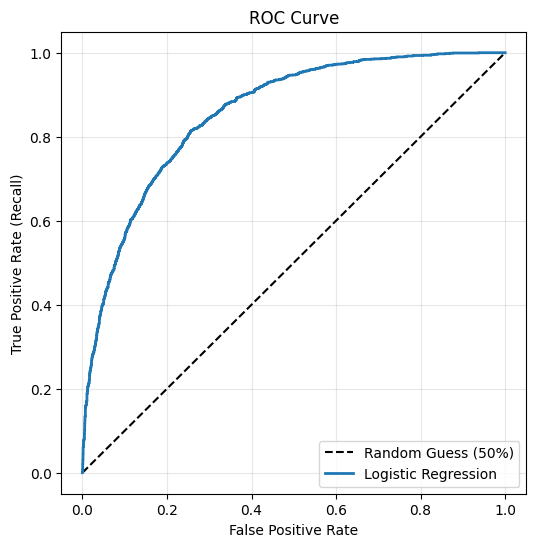

In [18]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# ROC-Kurve berechnen
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# ROC-Kurve plotten
fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (50%)')  # Diagonale
plt.plot(fpr, tpr, label='Logistic Regression', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## AUC - Area Under the Curve

**AUC** = Fläche unter der ROC-Kurve

**Interpretation**:
- **AUC = 0.5**: Modell nicht besser als Zufall (nutzlos!)
- **AUC = 0.7-0.8**: Akzeptables Modell
- **AUC = 0.8-0.9**: Gutes Modell ✅
- **AUC = 0.9-1.0**: Sehr gutes Modell! 🏆
- **AUC = 1.0**: Perfektes Modell (in Praxis sehr selten)

**Vorteil von AUC**:
- **Eine einzige Zahl** zur Modellbewertung
- Unabhängig vom Schwellenwert
- Gut vergleichbar zwischen Modellen


In [19]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_scores[:,1])
print('AUC: ' + str(auc))

if auc < 0.7:
    print("→ Modell ist schwach")
elif auc < 0.8:
    print("→ Modell ist akzeptabel")
elif auc < 0.9:
    print("→ Modell ist gut! ✅")
else:
    print("→ Modell ist sehr gut! 🏆")


AUC: 0.8568352001104227
→ Modell ist gut! ✅


## Preprocessing mit Pipelines

**Warum Preprocessing?**
- **Numerische Features** haben unterschiedliche Skalen (z.B. BMI: 20-40, Glucose: 50-200)
- **Kategorische Features** (z.B. Age) müssen encodiert werden
- Ohne Preprocessing: Features mit großen Werten dominieren

**Pipeline-Vorteil**:
- Preprocessing + Modell in **einem Objekt**
- Bei neuen Daten: **Automatisch** dieselben Transformationen
- **Reproduzierbar** und sauber

**Preprocessing-Schritte**:
1. **StandardScaler**: Numerische Features → Mittelwert=0, Std=1
2. **OneHotEncoder**: Age-Feature → Binär-Vektoren

**Wichtig**: Age wird hier als kategor

isch behandelt (Beispiel für One-Hot Encoding)


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Numerische Features (Indizes 0-6)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Kategorisches Feature (Index 7 = Age)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Preprocessing kombinieren
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Pipeline: Preprocessing + Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])

# Pipeline trainieren
model = pipeline.fit(X_train, y_train)
print("✅ Pipeline trainiert!")
print(model)


✅ Pipeline trainiert!
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


## Pipeline-Modell evaluieren

Jetzt testen wir, ob Preprocessing die Performance verbessert!

**Erwartung**: Bessere Metriken als ohne Preprocessing


Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202440539337694


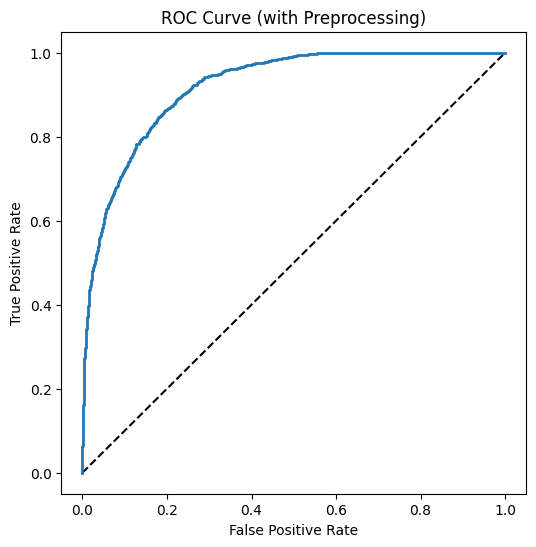

In [21]:
# Vorhersagen mit Pipeline-Modell
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Alle Metriken berechnen
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:\n', cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))
auc = roc_auc_score(y_test, y_scores[:,1])
print('AUC: ' + str(auc))

# ROC-Kurve plotten
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (with Preprocessing)')
plt.show()


## Alternative Algorithmen testen

**Logistic Regression** ist linear und einfach. Aber es gibt bessere Algorithmen!

**Alternativen**:
- **Support Vector Machine (SVM)**: Definiert Hyperplane zur Trennung
- **Decision Tree**: Erstellt Entscheidungsbaum
- **Ensemble-Methoden**: Kombinieren mehrere Modelle

**Jetzt**: Random Forest (Ensemble-Algorithmus)

**Random Forest**:
- Erstellt viele Entscheidungsbäume (hier: 100)
- Jeder Baum "wählt" eine Klasse
- Finale Vorhersage = Mehrheitsentscheidung
- **Vorteil**: Robuster, weniger Overfitting


In [22]:
from sklearn.ensemble import RandomForestClassifier

# Pipeline mit Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logregressor', RandomForestClassifier(n_estimators=100))])

# Trainieren
model = pipeline.fit(X_train, y_train)
print("✅ Random Forest trainiert!")
print(model)


✅ Random Forest trainiert!
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


## Random Forest Performance

Vergleichen wir Random Forest mit Logistic Regression!

**Erwartung**: Random Forest sollte besser sein (höhere AUC)


Confusion Matrix:
 [[2849  137]
 [ 176 1338]] 

Accuracy: 0.9304444444444444
Overall Precision: 0.9071186440677966
Overall Recall: 0.8837516512549538

AUC: 0.9819255601437267


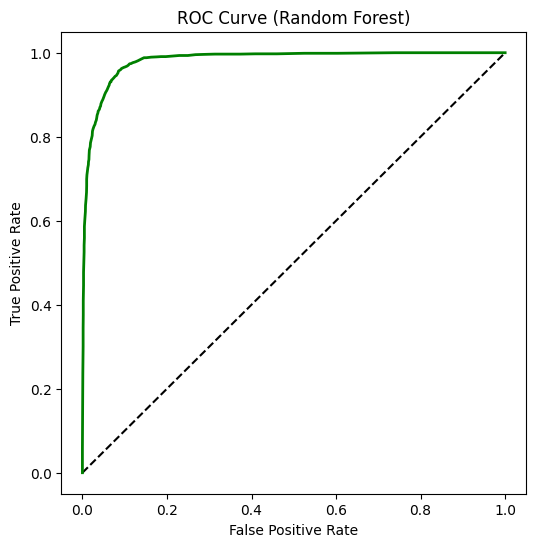

In [23]:
# Vorhersagen mit Random Forest
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Metriken
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:\n', cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))
auc = roc_auc_score(y_test, y_scores[:,1])
print('\nAUC: ' + str(auc))

# ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, linewidth=2, color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.show()


## Modell speichern

Jetzt haben wir ein gutes Modell! Zeit, es zu speichern für spätere Verwendung.

**joblib** speichert:
- ✅ Das trainierte Modell
- ✅ Alle Preprocessing-Schritte
- ✅ Modell-Parameter

**Use Case**: Modell in Produktion deployen, mit anderen teilen, wiederverwenden


In [24]:
import joblib

# Modell speichern
filename = './diabetes_model.pkl'
joblib.dump(model, filename)
print(f"✅ Modell gespeichert als: {filename}")


✅ Modell gespeichert als: ./diabetes_model.pkl


## Modell laden und verwenden

Wir laden das gespeicherte Modell und machen eine Vorhersage für einen neuen Patienten.

**Szenario**: Ein neuer Patient kommt in die Klinik. Sollte er auf Diabetes getestet werden?

**Features**: [Pregnancies, PlasmaGlucose, DiastolicBloodPressure, TricepsThickness, SerumInsulin, BMI, DiabetesPedigree, Age]


In [25]:
# Modell laden
model = joblib.load(filename)

# Neuer Patient
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print('Neuer Patient:', list(X_new[0]))

# Vorhersage
pred = model.predict(X_new)
proba = model.predict_proba(X_new)

print(f'\nVorhersage: Klasse {pred[0]}')
if pred[0] == 1:
    print("→ Patient sollte auf Diabetes getestet werden!")
    print(f"   Wahrscheinlichkeit: {proba[0][1]:.1%}")
else:
    print("→ Patient wahrscheinlich nicht diabetisch")
    print(f"   Wahrscheinlichkeit: {proba[0][0]:.1%}")


Neuer Patient: [np.float64(2.0), np.float64(180.0), np.float64(74.0), np.float64(24.0), np.float64(21.0), np.float64(23.9091702), np.float64(1.488172308), np.float64(22.0)]

Vorhersage: Klasse 1
→ Patient sollte auf Diabetes getestet werden!
   Wahrscheinlichkeit: 90.0%


## Test mit neuem Patienten

**Input**: 
- PlasmaGlucose: 180 (HOCH!)
- DiabetesPedigree: 1.49 (starke Genetik)
- Alter: 22, BMI: 23.9 (normal)

**Output**: 
- Klasse 1 (Diabetisch)
- Wahrscheinlichkeit: 90%

**Interpretation**: 
Trotz jungem Alter dominiert hoher Blutzucker + Genetik
→ Test dringend empfohlen! ✅

**Learning**: Modell gewichtet Features korrekt nach Wichtigkeit


## ✅ Zusammenfassung & Learnings

### Was wir gelernt haben:

**1. Alternative Metriken zu Accuracy**:
- ✅ **Precision**: Wie genau sind positive Vorhersagen?
- ✅ **Recall**: Wie viele Positive wurden gefunden?
- ✅ **F1-Score**: Balance zwischen Precision und Recall
- ✅ **Confusion Matrix**: Zeigt alle 4 Fehlertypen

**2. ROC-Kurve & AUC**:
- ✅ Visualisiert Performance über alle Schwellenwerte
- ✅ AUC = Eine Zahl zur Modellbewertung (0.5-1.0)
- ✅ Unabhängig von Klassenverteilung

**3. Preprocessing mit Pipelines**:
- ✅ StandardScaler für numerische Features
- ✅ OneHotEncoder für kategorische Features
- ✅ Pipeline = Preprocessing + Modell in einem

**4. Algorithmen-Vergleich**:
- ✅ Logistic Regression: Einfach, interpretierbar
- ✅ Random Forest: Besser, aber komplexer
- ✅ Immer mehrere Algorithmen testen!

**5. Model Persistence**:
- ✅ joblib speichert & lädt Modelle
- ✅ Inkl. aller Preprocessing-Schritte

---

### Key Takeaways 🎯

| Metrik | Wann wichtig? | Formel |
|--------|---------------|--------|
| **Accuracy** | Balancierte Klassen | (TP+TN) / Total |
| **Precision** | Falsch-Positive teuer | TP / (TP+FP) |
| **Recall** | Falsch-Negative gefährlich | TP / (TP+FN) |
| **AUC** | Gesamtperformance | Fläche unter ROC |

---

### Wichtigste Erkenntnis

**Accuracy allein reicht NICHT!**
- Bei unbalancierten Klassen oft irreführend
- Confusion Matrix zeigt wahre Performance
- Precision & Recall zeigen Trade-offs
- AUC ist robust und vergleichbar

**Nächste Schritte**: Multi-Class Klassifikation! 🚀
